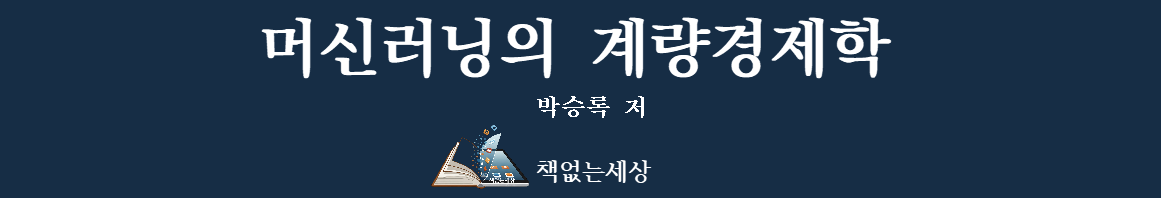

# Part 8: 머신러닝의 계량경제

## Chapter 3: 머신러닝의 자동화: Pycaret 활용

In [1]:
# 작업공간(working directory)지정  
import os  
os.chdir("E:/JupyterWDirectory/MyStock")
# 현재 작업공간(working directory)확인  
os.getcwd() 

'E:\\JupyterWDirectory\\MyStock'

In [ ]:
# 가상환경(myenv310) 만들기: 현재 파이썬 3.12가 설치되어 있지만 pycaret은 파이썬 3.8~3.11을 필요로 함
# anaconda prompt에서 다음 명령어를 순차적으로 실행하여 가상환경 만듬
# conda create -n myenv310 python=3.10
# conda activate myenv310
# pip install ipykernel
# python -m ipykernel install --user --name=myenv310 --display-name "Python (myenv310)"
# pip install matplotlib numpy pandas seaborn scipy scikit-learn statsmodels linearmodels pycaret ....... (가상환경에 라이브러리 설치)
# 현재의 가상환경은 우측상단에서 선택하여야 함

# 선택된 커넬에 설치된 라이브러리 확인을 위해서는 
# !pip list

# 설치된 파이썬 버전확인을 위해서는 
# import sys
# print(sys.version)
# print(sys.executable)

# 현재 설치된 라이브러리 리스트, 내보내기, 설치하기
# !pip listb
# !pip freeze > requirement.txt
# !pip install -r requirement.txt

In [2]:
# 라이브러리 불러오기
exec(open('Functions/Machine Learning_Econometrics_Lib.py').read())

In [ ]:
"""
import matplotlib as mpl
import numpy as np
import pandas as pd
import seaborn as sns

from joblib import dump
from joblib import load
from matplotlib import pyplot
from pandas import read_csv
from pandas.plotting import scatter_matrix
from pickle import dump
from pickle import load
from scipy.stats import uniform
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import VarianceThreshold

from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion
from sklearn.preprocessing import Binarizer
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler

from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor

import warnings
warnings.filterwarnings("ignore")

# Korean Fonts
mpl.rc('font', family='NanumGothic')
mpl.rc('axes', unicode_minus=False)
"""

## 3. PyCaret을 이용한 회귀(Regression)

In [3]:
# 데이터세트 불러오기
from pandas import read_csv
name = ('educ exper tenure nonwhite female married numdep lwage expersq tenursq').split()
data = read_csv('./Data/wage1.csv', usecols=name)
display(data)

,educ,exper,tenure,nonwhite,female,married,numdep,lwage,expersq,tenursq
0,11,2,0,0,1,0,2,1.131,4,0
1,12,22,2,0,1,1,3,1.176,484,4
2,11,2,0,0,0,0,2,1.099,4,0
3,8,44,28,0,0,1,0,1.792,1936,784
4,12,7,2,0,0,1,1,1.668,49,4
...,...,...,...,...,...,...,...,...,...,...
521,16,14,2,0,1,1,2,2.708,196,4
522,10,2,0,0,1,0,3,0.820,4,0
523,15,13,18,0,0,1,3,1.541,169,324
524,16,5,1,0,0,1,0,2.448,25,1


#### 1) 셋업(Setup)

In [4]:
# import pycaret regression and init setup
from pycaret.regression import *
model = setup(data, target = 'lwage', session_id = 12345)

,Description,Value
0,Session id,12345
1,Target,lwage
2,Target type,Regression
3,Original data shape,"(526, 10)"
4,Transformed data shape,"(526, 10)"
5,Transformed train set shape,"(368, 10)"
6,Transformed test set shape,"(158, 10)"
7,Numeric features,9
8,Preprocess,True
9,Imputation type,simple


In [5]:
# 파라미터, 변수 리스트
get_config()

{'USI',
 'X',
 'X_test',
 'X_test_transformed',
 'X_train',
 'X_train_transformed',
 'X_transformed',
 '_available_plots',
 '_ml_usecase',
 'data',
 'dataset',
 'dataset_transformed',
 'exp_id',
 'exp_name_log',
 'fold_generator',
 'fold_groups_param',
 'fold_shuffle_param',
 'gpu_n_jobs_param',
 'gpu_param',
 'html_param',
 'idx',
 'is_multiclass',
 'log_plots_param',
 'logging_param',
 'memory',
 'n_jobs_param',
 'pipeline',
 'seed',
 'target_param',
 'test',
 'test_transformed',
 'train',
 'train_transformed',
 'transform_target_param',
 'variable_and_property_keys',
 'variables',
 'y',
 'y_test',
 'y_test_transformed',
 'y_train',
 'y_train_transformed',
 'y_transformed'}

In [6]:
# X_train_transformed 출력
get_config('X_train_transformed')

,educ,exper,tenure,nonwhite,female,married,numdep,expersq,tenursq
180,16.0,3.0,2.0,0.0,0.0,1.0,1.0,9.0,4.0
334,13.0,29.0,1.0,0.0,1.0,1.0,0.0,841.0,1.0
408,16.0,24.0,2.0,0.0,1.0,1.0,2.0,576.0,4.0
292,16.0,3.0,1.0,0.0,1.0,0.0,0.0,9.0,1.0
73,12.0,20.0,34.0,0.0,1.0,1.0,2.0,400.0,1156.0
...,...,...,...,...,...,...,...,...,...
420,14.0,10.0,1.0,0.0,1.0,1.0,2.0,100.0,1.0
129,11.0,13.0,1.0,0.0,0.0,1.0,0.0,169.0,1.0
285,12.0,26.0,1.0,0.0,0.0,1.0,0.0,676.0,1.0
485,11.0,11.0,8.0,0.0,0.0,1.0,2.0,121.0,64.0


In [8]:
# setup() 사용법
help(setup)

Help on function setup in module pycaret.regression.functional:

setup(data: Union[dict, list, tuple, numpy.ndarray, scipy.sparse._base.spmatrix, pandas.core.frame.DataFrame, NoneType] = None, data_func: Optional[Callable[[], Union[dict, list, tuple, numpy.ndarray, scipy.sparse._base.spmatrix, pandas.core.frame.DataFrame]]] = None, target: Union[int, str, list, tuple, numpy.ndarray, pandas.core.series.Series] = -1, index: Union[bool, int, str, list, tuple, numpy.ndarray, pandas.core.series.Series] = True, train_size: float = 0.7, test_data: Union[dict, list, tuple, numpy.ndarray, scipy.sparse._base.spmatrix, pandas.core.frame.DataFrame, NoneType] = None, ordinal_features: Optional[Dict[str, list]] = None, numeric_features: Optional[List[str]] = None, categorical_features: Optional[List[str]] = None, date_features: Optional[List[str]] = None, text_features: Optional[List[str]] = None, ignore_features: Optional[List[str]] = None, keep_features: Optional[List[str]] = None, preprocess: boo

You can use any of the two method i.e. Functional or OOP and even switch back and forth between two set of API's. The choice of method will not impact the results and has been tested for consistency.
___

In [9]:
# setup()에서 변수의 변환 normalize = True
model = setup(data, target = 'lwage', session_id = 12345,
              normalize = True, normalize_method = 'minmax')

,Description,Value
0,Session id,12345
1,Target,lwage
2,Target type,Regression
3,Original data shape,"(526, 10)"
4,Transformed data shape,"(526, 10)"
5,Transformed train set shape,"(368, 10)"
6,Transformed test set shape,"(158, 10)"
7,Numeric features,9
8,Preprocess,True
9,Imputation type,simple


<Axes: >

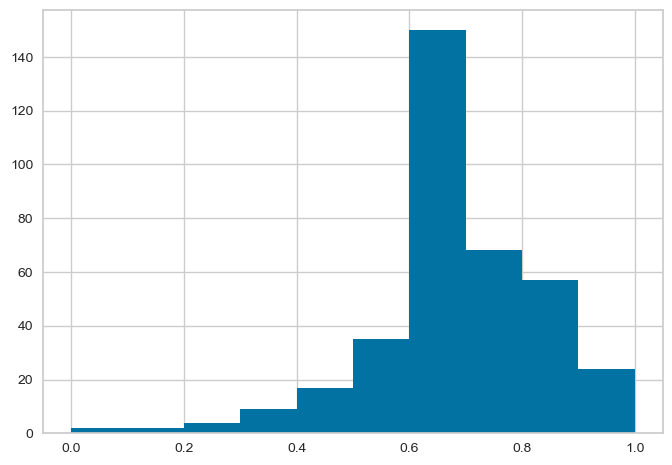

In [10]:
# X_train_transformed에서 특정변수 히스토그램
get_config('X_train_transformed')['educ'].hist()

Notice that all the values are between 0 and 1 - that is because we passed `normalize=True` in the `setup` function. If you don't remember how it compares to actual data, no problem - we can also access non-transformed values using `get_config` and then compare. See below and notice the range of values on x-axis and compare it with histogram above.

<Axes: >

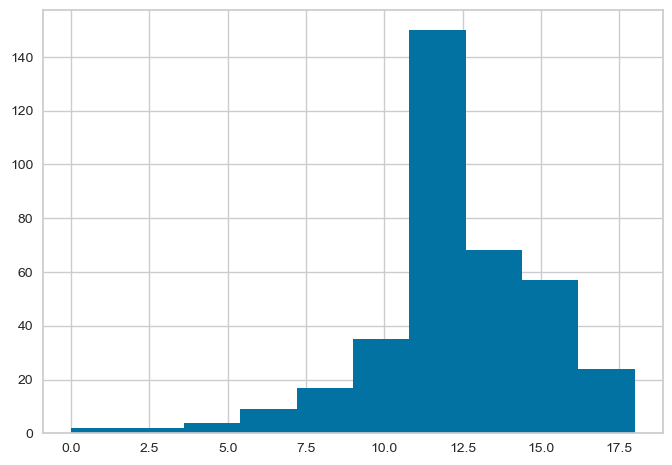

In [11]:
get_config('X_train')['educ'].hist()

___

#### 2) 모형비교(Compare Models)

In [14]:
# 회귀분석 활용가능 모형
models()

,Name,Reference,Turbo
ID,,,
lr,Linear Regression,sklearn.linear_model._base.LinearRegression,True
lasso,Lasso Regression,sklearn.linear_model._coordinate_descent.Lasso,True
ridge,Ridge Regression,sklearn.linear_model._ridge.Ridge,True
en,Elastic Net,sklearn.linear_model._coordinate_descent.Elast...,True
lar,Least Angle Regression,sklearn.linear_model._least_angle.Lars,True
llar,Lasso Least Angle Regression,sklearn.linear_model._least_angle.LassoLars,True
omp,Orthogonal Matching Pursuit,sklearn.linear_model._omp.OrthogonalMatchingPu...,True
br,Bayesian Ridge,sklearn.linear_model._bayes.BayesianRidge,True
ard,Automatic Relevance Determination,sklearn.linear_model._bayes.ARDRegression,False


In [12]:
# 모형비교
best = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
br,Bayesian Ridge,0.3167,0.1692,0.4069,0.4097,0.1508,0.2257,0.0110
lr,Linear Regression,0.3169,0.1695,0.4075,0.4078,0.1513,0.2261,1.2650
lar,Least Angle Regression,0.3169,0.1695,0.4075,0.4078,0.1513,0.2261,0.0110
huber,Huber Regressor,0.3167,0.1697,0.4075,0.4061,0.1513,0.2254,0.0150
ridge,Ridge Regression,0.3202,0.1734,0.4115,0.3976,0.1521,0.2273,0.0120
gbr,Gradient Boosting Regressor,0.3153,0.1726,0.4103,0.3895,0.1509,0.2197,0.0310
lightgbm,Light Gradient Boosting Machine,0.3195,0.1795,0.4202,0.3585,0.1529,0.2191,0.1350
rf,Random Forest Regressor,0.3173,0.1824,0.4207,0.3561,0.1551,0.2212,0.0710
ada,AdaBoost Regressor,0.3306,0.1835,0.4250,0.3464,0.1609,0.2391,0.0330
knn,K Neighbors Regressor,0.3339,0.1914,0.4335,0.3198,0.1587,0.2342,0.0150


In [13]:
print(best)

BayesianRidge()


#### 3) 모형 생성과 평가(Create and Evaluate Model)

In [15]:
# 선형회귀모형에 10겹 CV실행
lr = create_model('lr')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.2693,0.1206,0.3473,0.5007,0.1309,0.1825
1,0.3226,0.1531,0.3913,0.3857,0.1434,0.1969
2,0.3261,0.1604,0.4004,0.4945,0.1415,0.1868
3,0.3678,0.2437,0.4936,0.2058,0.2101,0.3568
4,0.3551,0.1894,0.4352,0.3281,0.1712,0.2701
5,0.2671,0.1163,0.3410,0.3526,0.1209,0.1489
6,0.3001,0.1404,0.3748,0.6128,0.1444,0.2174
7,0.3849,0.2539,0.5039,0.4848,0.1877,0.2576
8,0.2742,0.1113,0.3337,0.3223,0.1307,0.1966


The function above has return trained model object as an output. The scoring grid is only displayed and not returned. If you need access to the scoring grid you can use `pull` function to access the dataframe.

In [17]:
lr_results = pull()
lr_results

<class 'pandas.core.frame.DataFrame'>


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.2693,0.1206,0.3473,0.5007,0.1309,0.1825
1,0.3226,0.1531,0.3913,0.3857,0.1434,0.1969
2,0.3261,0.1604,0.4004,0.4945,0.1415,0.1868
3,0.3678,0.2437,0.4936,0.2058,0.2101,0.3568
4,0.3551,0.1894,0.4352,0.3281,0.1712,0.2701
5,0.2671,0.1163,0.3410,0.3526,0.1209,0.1489
6,0.3001,0.1404,0.3748,0.6128,0.1444,0.2174
7,0.3849,0.2539,0.5039,0.4848,0.1877,0.2576
8,0.2742,0.1113,0.3337,0.3223,0.1307,0.1966


In [18]:
# create_model 활용법
help(create_model)

Help on function create_model in module pycaret.regression.functional:

create_model(estimator: Union[str, Any], fold: Union[int, Any, NoneType] = None, round: int = 4, cross_validation: bool = True, fit_kwargs: Optional[dict] = None, groups: Union[str, Any, NoneType] = None, experiment_custom_tags: Optional[Dict[str, Any]] = None, engine: Optional[str] = None, verbose: bool = True, return_train_score: bool = False, **kwargs)
    This function trains and evaluates the performance of a given estimator
    using cross validation. The output of this function is a score grid with
    CV scores by fold. Metrics evaluated during CV can be accessed using the
    ``get_metrics`` function. Custom metrics can be added or removed using
    ``add_metric`` and ``remove_metric`` function. All the available models
    can be accessed using the ``models`` function.
    
    
    Example
    -------
    >>> from pycaret.datasets import get_data
    >>> boston = get_data('boston')
    >>> from pycaret.r

In [19]:
# 모형의 평가
evaluate_model(lr)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

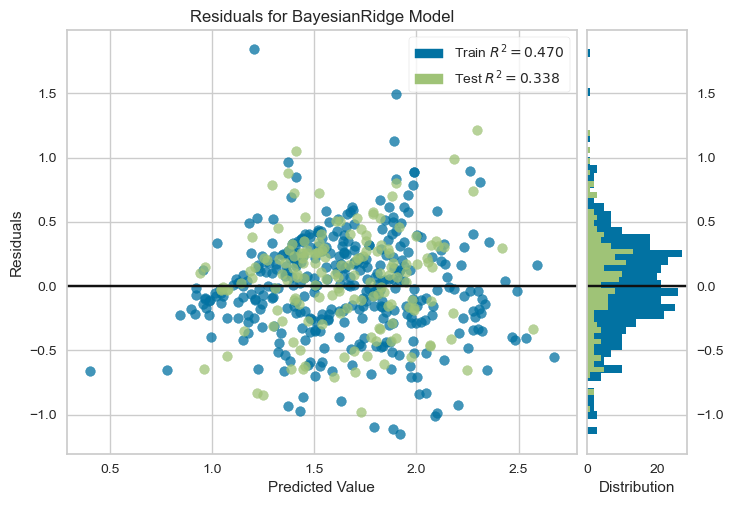

In [21]:
plot_model(best, plot = 'residuals')

#### 4) 모형 튜닝(Tune Model)

In [20]:
# tune_model 활용법
help(tune_model)

Help on function tune_model in module pycaret.regression.functional:

tune_model(estimator, fold: Union[int, Any, NoneType] = None, round: int = 4, n_iter: int = 10, custom_grid: Union[Dict[str, list], Any, NoneType] = None, optimize: str = 'R2', custom_scorer=None, search_library: str = 'scikit-learn', search_algorithm: Optional[str] = None, early_stopping: Any = False, early_stopping_max_iters: int = 10, choose_better: bool = True, fit_kwargs: Optional[dict] = None, groups: Union[str, Any, NoneType] = None, return_tuner: bool = False, verbose: bool = True, tuner_verbose: Union[int, bool] = True, return_train_score: bool = False, **kwargs)
    This function tunes the hyperparameters of a given estimator. The output of
    this function is a score grid with CV scores by fold of the best selected
    model based on ``optimize`` parameter. Metrics evaluated during CV can be
    accessed using the ``get_metrics`` function. Custom metrics can be added
    or removed using ``add_metric`` an

In [21]:
# dt 모형의 생성
dt = create_model('dt')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.3754,0.1955,0.4421,0.1909,0.1683,0.2430
1,0.4854,0.3640,0.6033,-0.4607,0.2246,0.2998
2,0.4228,0.3011,0.5487,0.0509,0.1881,0.2407
3,0.5130,0.4824,0.6946,-0.5723,0.2786,0.4832
4,0.3359,0.1736,0.4167,0.3841,0.1548,0.2302
5,0.3536,0.1928,0.4391,-0.0732,0.1617,0.1908
6,0.3529,0.2272,0.4767,0.3736,0.1713,0.2273
7,0.4803,0.3763,0.6134,0.2365,0.2344,0.3426
8,0.3050,0.1582,0.3978,0.0368,0.1575,0.2135


In [22]:
# 모형의 hyperparameters 튜닝
tuned_dt = tune_model(dt)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.2319,0.0995,0.3154,0.5882,0.1158,0.1436
1,0.4068,0.2294,0.4790,0.0793,0.1780,0.2499
2,0.3469,0.1886,0.4343,0.4054,0.1533,0.1928
3,0.3996,0.2895,0.5381,0.0565,0.2228,0.3662
4,0.3623,0.2272,0.4767,0.1939,0.1802,0.2680
5,0.3496,0.1905,0.4364,-0.0603,0.1529,0.1865
6,0.3686,0.2170,0.4658,0.4019,0.1755,0.2608
7,0.3999,0.2962,0.5443,0.3990,0.2032,0.2634
8,0.2878,0.1275,0.3571,0.2237,0.1412,0.2083


Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [23]:
# 설정된 tuning grid
dt_grid = {'max_depth' : [None, 2, 4, 6, 8, 10, 12]}

# 설정된 grid에 대한 튜닝(MAE 기준 평가)
tuned_dt = tune_model(dt, custom_grid = dt_grid, optimize = 'MAE')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.2679,0.1199,0.3462,0.5038,0.1288,0.1726
1,0.4118,0.2284,0.4779,0.0834,0.1773,0.2524
2,0.3587,0.1914,0.4374,0.3968,0.1524,0.2005
3,0.3634,0.2573,0.5073,0.1614,0.2122,0.3378
4,0.3281,0.1972,0.4440,0.3005,0.1705,0.2545
5,0.3512,0.1869,0.4323,-0.0405,0.1539,0.1844
6,0.3147,0.1692,0.4114,0.5334,0.1496,0.2141
7,0.4204,0.2687,0.5184,0.4549,0.2106,0.3043
8,0.3168,0.1555,0.3944,0.0532,0.1518,0.2252


Fitting 10 folds for each of 7 candidates, totalling 70 fits


####  5) 앙상블 모형(Ensemble Model)

In [24]:
# ensemble_model 활용법
help(ensemble_model)

Help on function ensemble_model in module pycaret.regression.functional:

ensemble_model(estimator, method: str = 'Bagging', fold: Union[int, Any, NoneType] = None, n_estimators: int = 10, round: int = 4, choose_better: bool = False, optimize: str = 'R2', fit_kwargs: Optional[dict] = None, groups: Union[str, Any, NoneType] = None, verbose: bool = True, return_train_score: bool = False) -> Any
    This function ensembles a given estimator. The output of this function is
    a score grid with CV scores by fold. Metrics evaluated during CV can be
    accessed using the ``get_metrics`` function. Custom metrics can be added
    or removed using ``add_metric`` and ``remove_metric`` function.
    
    
    Example
    --------
    >>> from pycaret.datasets import get_data
    >>> boston = get_data('boston')
    >>> from pycaret.regression import *
    >>> exp_name = setup(data = boston,  target = 'medv')
    >>> dt = create_model('dt')
    >>> bagged_dt = ensemble_model(dt, method = 'Bagging'

In [25]:
# 배깅(Bagging)
ensemble_model(dt, method = 'Bagging')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.2646,0.1134,0.3367,0.5308,0.1236,0.1731
1,0.3638,0.1979,0.4448,0.2061,0.1629,0.2207
2,0.2995,0.1477,0.3844,0.5343,0.1363,0.1718
3,0.4059,0.3065,0.5536,0.0010,0.2317,0.3995
4,0.3005,0.1792,0.4233,0.3643,0.1567,0.2236
5,0.3149,0.1998,0.4470,-0.1124,0.1740,0.1671
6,0.3104,0.1546,0.3932,0.5738,0.1414,0.2035
7,0.3989,0.2942,0.5424,0.4032,0.2119,0.2522
8,0.2834,0.1292,0.3595,0.2135,0.1425,0.2087


BaggingRegressor(estimator=DecisionTreeRegressor(random_state=12345),
                 random_state=12345)

In [26]:
# 부스팅(boosting)
ensemble_model(dt, method = 'Boosting')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.3109,0.1737,0.4168,0.2810,0.1704,0.1917
1,0.3873,0.2425,0.4924,0.0271,0.1854,0.2266
2,0.3634,0.2522,0.5022,0.2049,0.1745,0.2028
3,0.4372,0.3409,0.5839,-0.1112,0.2435,0.4225
4,0.3164,0.1607,0.4009,0.4298,0.1528,0.2348
5,0.3632,0.3267,0.5715,-0.8184,0.1662,0.1933
6,0.3595,0.2197,0.4687,0.3943,0.1663,0.2253
7,0.4057,0.2527,0.5027,0.4873,0.1993,0.2754
8,0.3037,0.1497,0.3869,0.0889,0.1525,0.2252


AdaBoostRegressor(estimator=DecisionTreeRegressor(random_state=12345),
                  n_estimators=10, random_state=12345)

#### 6) 블랜딩 및 스태킹(Blend and Stacking Models)

In [27]:
# mae기준 상위 3개 모형 선정
best_MAE_models_top3 = compare_models(sort = 'MAE', n_select = 3)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,0.3153,0.1726,0.4103,0.3895,0.1509,0.2197,0.0310
br,Bayesian Ridge,0.3167,0.1692,0.4069,0.4097,0.1508,0.2257,0.0100
huber,Huber Regressor,0.3167,0.1697,0.4075,0.4061,0.1513,0.2254,0.0140
lr,Linear Regression,0.3169,0.1695,0.4075,0.4078,0.1513,0.2261,0.0100
lar,Least Angle Regression,0.3169,0.1695,0.4075,0.4078,0.1513,0.2261,0.0100
rf,Random Forest Regressor,0.3173,0.1824,0.4207,0.3561,0.1551,0.2212,0.0720
lightgbm,Light Gradient Boosting Machine,0.3195,0.1795,0.4202,0.3585,0.1529,0.2191,0.1260
ridge,Ridge Regression,0.3202,0.1734,0.4115,0.3976,0.1521,0.2273,0.0110
ada,AdaBoost Regressor,0.3306,0.1835,0.4250,0.3464,0.1609,0.2391,0.0330
et,Extra Trees Regressor,0.3325,0.1993,0.4405,0.2778,0.1659,0.2312,0.0560


In [28]:
best_MAE_models_top3

[GradientBoostingRegressor(random_state=12345),
 BayesianRidge(),
 HuberRegressor()]

In [29]:
# 3개 상위모형의 블랜딩(blending top 3 models)
blend_models(best_MAE_models_top3)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.2469,0.0970,0.3115,0.5983,0.1170,0.1641
1,0.3235,0.1500,0.3873,0.3981,0.1409,0.1934
2,0.3268,0.1672,0.4089,0.4730,0.1445,0.1862
3,0.3564,0.2404,0.4903,0.2165,0.2079,0.3436
4,0.3278,0.1667,0.4083,0.4085,0.1617,0.2549
5,0.2599,0.1164,0.3411,0.3523,0.1206,0.1424
6,0.2861,0.1238,0.3518,0.6588,0.1333,0.2028
7,0.3608,0.2218,0.4709,0.5501,0.1713,0.2392
8,0.2656,0.1098,0.3313,0.3319,0.1296,0.1902


VotingRegressor(estimators=[('Gradient Boosting Regressor',
                             GradientBoostingRegressor(random_state=12345)),
                            ('Bayesian Ridge', BayesianRidge()),
                            ('Huber Regressor', HuberRegressor())],
                n_jobs=-1)

In [30]:
# blend_models 사용법
help(blend_models)

Help on function blend_models in module pycaret.regression.functional:

blend_models(estimator_list: list, fold: Union[int, Any, NoneType] = None, round: int = 4, choose_better: bool = False, optimize: str = 'R2', weights: Optional[List[float]] = None, fit_kwargs: Optional[dict] = None, groups: Union[str, Any, NoneType] = None, verbose: bool = True, return_train_score: bool = False)
    This function trains a Voting Regressor for select models passed in the
    ``estimator_list`` param. The output of this function is a score grid with
    CV scores by fold. Metrics evaluated during CV can be accessed using the
    ``get_metrics`` function. Custom metrics can be added or removed using
    ``add_metric`` and ``remove_metric`` function.
    
    
    Example
    --------
    >>> from pycaret.datasets import get_data
    >>> boston = get_data('boston')
    >>> from pycaret.regression import *
    >>> exp_name = setup(data = boston,  target = 'medv')
    >>> top3 = compare_models(n_select =

In [31]:
# 스태깅 모형(stacking models)
stack_models(best_MAE_models_top3)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.2443,0.0946,0.3076,0.6084,0.1151,0.1612
1,0.3243,0.1508,0.3883,0.3950,0.1412,0.1929
2,0.3307,0.1730,0.4159,0.4548,0.1479,0.1902
3,0.3529,0.2405,0.4904,0.2162,0.2073,0.3381
4,0.3298,0.1697,0.4120,0.3979,0.1623,0.2557
5,0.2608,0.1168,0.3417,0.3499,0.1209,0.1430
6,0.2857,0.1237,0.3517,0.6591,0.1344,0.2047
7,0.3654,0.2276,0.4771,0.5381,0.1742,0.2423
8,0.2655,0.1100,0.3317,0.3304,0.1296,0.1898


StackingRegressor(cv=5,
                  estimators=[('Gradient Boosting Regressor',
                               GradientBoostingRegressor(random_state=12345)),
                              ('Bayesian Ridge', BayesianRidge()),
                              ('Huber Regressor', HuberRegressor())],
                  final_estimator=LinearRegression(n_jobs=-1), n_jobs=-1)

In [56]:
help(stack_models)

Help on function stack_models in module pycaret.regression.functional:

stack_models(estimator_list: list, meta_model=None, meta_model_fold: Union[int, Any, NoneType] = 5, fold: Union[int, Any, NoneType] = None, round: int = 4, restack: bool = False, choose_better: bool = False, optimize: str = 'R2', fit_kwargs: Optional[dict] = None, groups: Union[str, Any, NoneType] = None, verbose: bool = True, return_train_score: bool = False)
    This function trains a meta model over select estimators passed in
    the ``estimator_list`` parameter. The output of this function is a
    score grid with CV scores by fold. Metrics evaluated during CV can
    be accessed using the ``get_metrics`` function. Custom metrics
    can be added or removed using ``add_metric`` and ``remove_metric``
    function.
    
    
    Example
    --------
    >>> from pycaret.datasets import get_data
    >>> boston = get_data('boston')
    >>> from pycaret.regression import *
    >>> exp_name = setup(data = boston,  t

#### 7) 예측(Prediction)

In [32]:
# 테스트 데이터에 대한 예측
predict_model(best)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Bayesian Ridge,0.3097,0.1542,0.3926,0.3379,0.1573,0.2371


,educ,exper,tenure,nonwhite,female,married,numdep,expersq,tenursq,lwage,prediction_label
323,10,5,0,0,1,0,0,25,0,1.619,1.073342
295,13,21,13,0,0,1,4,441,169,1.792,2.106734
247,11,38,3,1,1,0,0,1444,9,0.673,1.401350
160,10,1,0,0,0,0,4,1,0,1.040,1.257165
381,16,15,5,1,1,1,2,225,25,1.182,1.879541
...,...,...,...,...,...,...,...,...,...,...,...
38,14,3,3,0,1,1,0,9,9,1.099,1.451598
191,16,9,2,0,0,1,1,81,4,1.833,2.001915
50,12,18,0,0,1,0,2,324,0,0.489,1.372885
163,12,47,4,0,1,1,0,2209,16,1.504,1.319403


In [36]:
# 임의의 데이터에 대한 예측
predictions = predict_model(best, data=data)
predictions

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Bayesian Ridge,0.3076,0.1582,0.3978,0.4389,0.1517,0.2241


,educ,exper,tenure,nonwhite,female,married,numdep,expersq,tenursq,lwage,prediction_label
0,11,2,0,0,1,0,2,4,0,1.131,1.054822
1,12,22,2,0,1,1,3,484,4,1.176,1.479784
2,11,2,0,0,0,0,2,4,0,1.099,1.380986
3,8,44,28,0,0,1,0,1936,784,1.792,1.768721
4,12,7,2,0,0,1,1,49,4,1.668,1.672746
...,...,...,...,...,...,...,...,...,...,...,...
521,16,14,2,0,1,1,2,196,4,2.708,1.731315
522,10,2,0,0,1,0,3,4,0,0.820,0.968138
523,15,13,18,0,0,1,3,169,324,1.541,2.278536
524,16,5,1,0,0,1,0,25,1,2.448,1.914065


#### 8) 모형 저장과 로딩(Save and Load Model)

In [37]:
# save model
save_model(best, './Output/Model_wage1')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['educ', 'exper', 'tenure',
                                              'nonwhite', 'female', 'married',
                                              'numdep', 'expersq', 'tenursq'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=[],
                                     transformer=SimpleImputer(strategy='most_frequent'))),
                 ('normalize', TransformerWrapper(transformer=MinMaxScaler())),
                 ('trained_model', BayesianRidge())]),
 './Output/Model_wage1.pkl')

In [40]:
# load model
loaded_from_disk = load_model('./Output/Model_wage1')
loaded_from_disk

Transformation Pipeline and Model Successfully Loaded


Pipeline(memory=FastMemory(location=C:\Users\PARKSE~1\AppData\Local\Temp\joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(include=['educ', 'exper', 'tenure',
                                             'nonwhite', 'female', 'married',
                                             'numdep', 'expersq', 'tenursq'],
                                    transformer=SimpleImputer())),
                ('categorical_imputer',
                 TransformerWrapper(include=[],
                                    transformer=SimpleImputer(strategy='most_frequent'))),
                ('normalize', TransformerWrapper(transformer=MinMaxScaler())),
                ('trained_model', BayesianRidge())])